[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guiwitz/DSL_CV2_PyTorch/blob/main/notebooks/04-Images.ipynb)
# Images, dimensions

Until now we have seen very simplified models that can perform regression tasks. However mostly deep learning models are used for more complex tasks such as image classification, segmentation etc. In those cases we have to be careful with the dimensions of our data and model.

## Image classification

Until now, we have seen models looking like this:

In [1]:
from torch import nn
import torch

lin_layer = nn.Linear(in_features=1, out_features=32)
lin_layer2 = nn.Linear(in_features=32, out_features=32)
lin_layer3 = nn.Linear(in_features=32, out_features=1)
model = nn.Sequential(lin_layer, nn.ReLU(), lin_layer2, nn.ReLU(), lin_layer3)

We used this model for linear regression where we have one input ($x$) and one output ($y$). What do we have to modify if we want to use this model for image classification? For example, we can have a look at examples from the quickdraw dataset:

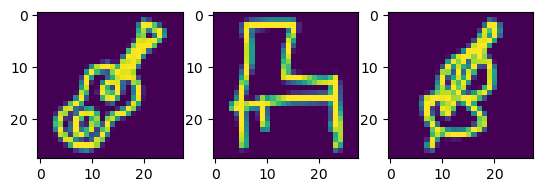

In [3]:
import skimage
import matplotlib.pyplot as plt

violin = skimage.io.imread('../data/violin.tif')
piano = skimage.io.imread('../data/piano.tif')
cello = skimage.io.imread('../data/cello.tif')

fig, ax = plt.subplots(1,3)
ax[0].imshow(violin)
ax[1].imshow(piano)
ax[2].imshow(cello);

Here the goal is to predict what sort of instrument a person has drawn: violin, piano or cello. So we have three possible categories. We therefore need three outputs for our model, each indicating the probability of a given class. So we have now:

In [4]:
n_cat = 3

lin_layer = nn.Linear(in_features=1, out_features=32)
lin_layer2 = nn.Linear(in_features=32, out_features=32)
lin_layer3 = nn.Linear(in_features=32, out_features=n_cat)
model = nn.Sequential(lin_layer, nn.ReLU(), lin_layer2, nn.ReLU(), lin_layer3)

The next problem is that we need now to push images through the network, both for training and inference. In other words, whereas before we had a single feature $x$, now we have all pixels of our image as features. The simplest we can do is for the moment to ignore that the image has a 2D structure (neighboring pixels are not random) and simply align all pixels in one long feature vector by flattening the images. Our images above are 28x28 pixels large, i.e. we fill have 784 features as input. So we can update the model again:

In [5]:
n_cat = 3
n_features = 784

lin_layer = nn.Linear(in_features=n_features, out_features=32)
lin_layer2 = nn.Linear(in_features=32, out_features=32)
lin_layer3 = nn.Linear(in_features=32, out_features=n_cat)
model = nn.Sequential(lin_layer, nn.ReLU(), lin_layer2, nn.ReLU(), lin_layer3)

We can still not push our images through the model: 1. they are still NumPy arrays, and 2. they are still 2D objects. Let's first convert: 

In [6]:
violin_torch = torch.tensor(violin, dtype=torch.float32)
violin_torch.dtype

torch.float32

In [7]:
violin_torch = violin_torch.flatten()
violin_torch.shape

torch.Size([784])

Now we can pass it:

In [8]:
model(violin_torch.flatten())

tensor([ 4.9707, -9.3863, -5.8933], grad_fn=<AddBackward0>)

### Image batches

As seen before, here also we can pass multiple images at the same time to the network as "batch". In this case we can simply stack our three images together:

In [9]:
violin_torch = torch.tensor(violin, dtype=torch.float32).flatten()
piano_torch = torch.tensor(piano, dtype=torch.float32).flatten()
cello_torch = torch.tensor(cello, dtype=torch.float32).flatten()

image_batch = torch.stack([violin_torch, piano_torch], axis=0)

In [10]:
image_batch.shape

torch.Size([2, 784])

In [11]:
model(image_batch).shape

torch.Size([2, 3])

Our output is indeed composed of a batch of 2, each element having 3 outputs.

## Exercise

Adapt the model developed for exercise 2 to be able to push and image through it and predict the three classes.